In [1]:
# Thsi is the code used for the paper results
# How changing the dataset sample size effects the calibration methods
# Fix training dataset size and change the calib set samples - best method is one that gets max calib with least data

# imports
import sys
import numpy as np
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal
import core_tools as ct

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 10,
    "exp_name": ct.generate_readable_short_id("Calib_size"),
    "path": "../../",
    "split": "random_split", #CV, random_split
    "cv_folds": 10,

    "test_split": 0.0588,
    "calib_split": 0.5,
    
    "plot": False,
    "calib_methods": ["RF_d", "RF_opt",
                      "Platt", "ISO", "Beta", "CRF", "VA",
                      "tlr", "Rank", #"Elkan"
                      # "RF_ens_k", "RF_ens_r", 
                      "RF_large",
                      ],
    
    "metrics": ["acc", "brier", "ece", "logloss", "tce"],

    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 1700,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 


    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 1000, 
    "boot_count": 5,

    # RF hyper opt
    "hyper_opt": True,
    "opt_cv":5, 
    "opt_n_iter":50,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": np.arange(2, 100).tolist(),
                    "criterion": ["gini", "entropy"],
                    "max_features": ['sqrt', 'log2', None],
                    "min_samples_split": np.arange(2, 11).tolist(),
                    "min_samples_leaf": np.arange(1, 11).tolist(),
                    # 'bootstrap': [True, False],                # Whether bootstrap samples are used
                    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Weight for each class
                    "oob_score": [False]
                    },
    
    "oob": False,
    "laplace": 1, # if set to 1, OOB must be false

    "exp_key": "calib_size",
    "exp_values":  np.arange(2, 100, 2).tolist()
}

ct.save_params(params)

In [3]:
calib_results_dict, data_list = cx.run_exp(params["exp_key"], params["exp_values"], params)
ct.save_results(calib_results_dict, params['exp_name'])

data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
data size train 800 test 100 calib 16
exp_param 2 done
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
data size train 800 test 100 calib 32
exp_param 4 done
data size train 800 test 100 calib 48
data size train 800 test 100 calib 48
data size train 800 test 100 calib 48
data size train 800 test 100 calib 48
data size train 800 test 100 calib 48
data size train 

In [4]:
plot_calib_methods = params["calib_methods"].copy()
plot_calib_methods.remove("RF_large")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF_d', 'RF_opt', 'Platt', 'ISO', 'Beta', 'CRF', 'VA', 'tlr', 'Rank']

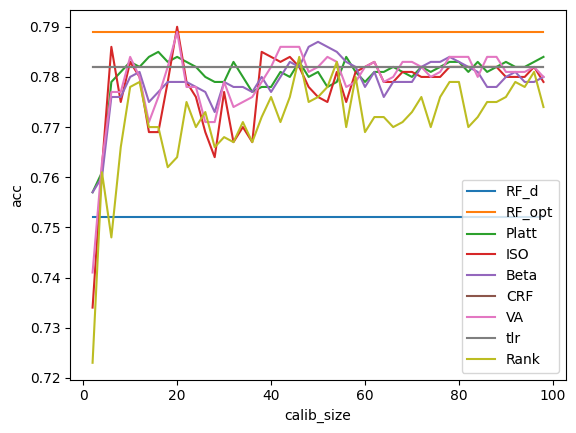

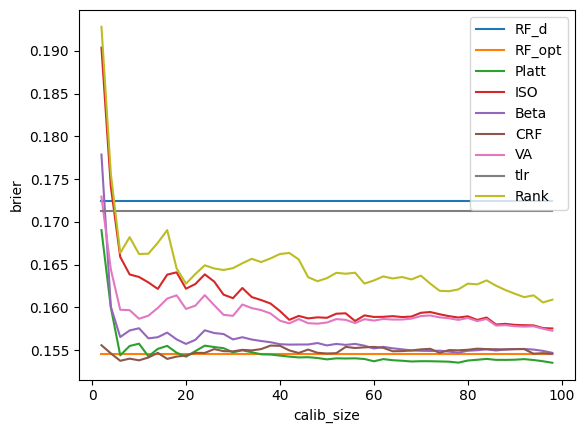

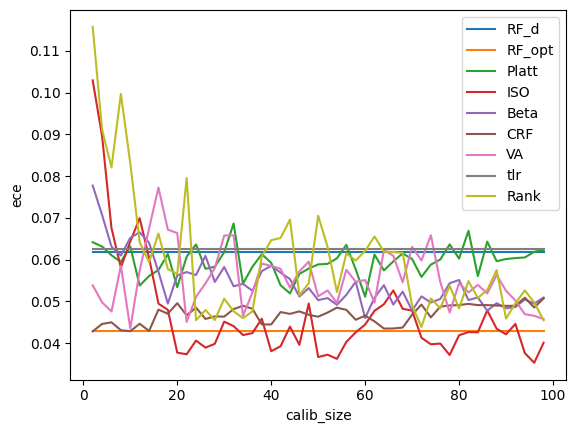

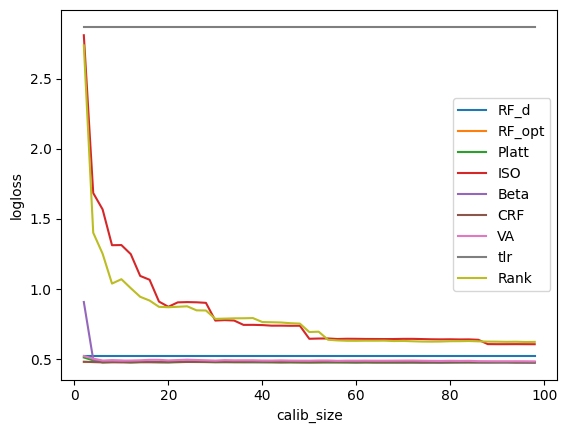

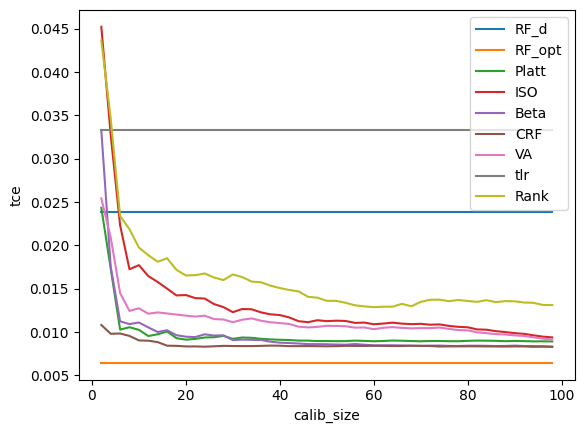

In [5]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in ["tce"]: # params["metrics"]: #
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(params["exp_key"])
    ax.set_ylabel(metric)